In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from datetime import datetime

In [206]:
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = '2018-07-01'

companies = ['EREGL.IS','SISE.IS','XU100.IS'] 
tickers = yf.Tickers(companies)
tickers_hist = tickers.history(period='max',start = start_date ,end=end_date,interval='1d',)
tickers_hist


[*********************100%%**********************]  3 of 3 completed


Close                          Dividends                   \
             EREGL.IS    SISE.IS      XU100.IS  EREGL.IS SISE.IS XU100.IS   
Date                                                                        
2018-07-02   5.529883   3.746255  96773.500000       0.0     0.0      0.0   
2018-07-03   5.719448   3.852785  96588.203125       0.0     0.0      0.0   
2018-07-04   5.681535   3.835030  97230.101562       0.0     0.0      0.0   
2018-07-05   5.811522   3.923803  99097.000000       0.0     0.0      0.0   
2018-07-06   5.768194   3.870540  98733.898438       0.0     0.0      0.0   
...               ...        ...           ...       ...     ...      ...   
2023-12-01  40.599998  48.919998   8026.299805       0.0     0.0      0.0   
2023-12-04  40.020000  48.959999   8087.200195       0.0     0.0      0.0   
2023-12-05  40.000000  48.400002   8057.399902       0.0     0.0      0.0   
2023-12-06  38.799999  46.900002   7855.100098       0.0     0.0      0.0   
2023-12-07  39.900002  47.980000   7978.799805       0.0     0.0      0.0   

                 High                                 Low  ...                \
             EREGL.IS    SISE.IS      XU100.IS   EREGL.IS  ...      XU100.IS   
Date                                                       ...                 
2018-07-02   5.556964   3.817275  97267.296875   5.443225  ...  95654.898438   
2018-07-03   5.822355   3.879417  97445.796875   5.519050  ...  96450.398438   
2018-07-04   5.762777   3.879417  97455.101562   5.649038  ...  96392.101562   
2018-07-05   5.865684   3.941558  99264.796875   5.692368  ...  97559.703125   
2018-07-06   5.871101   3.959313  99806.398438   5.708616  ...  98109.898438   
...               ...        ...           ...        ...  ...           ...   
2023-12-01  41.799999  50.000000   8090.200195  40.360001  ...   7956.600098   
2023-12-04  40.799999  49.320000   8108.200195  40.000000  ...   7962.299805   
2023-12-05  40.560001  49.099998   8120.500000  39.980000  ...   8023.399902   
2023-12-06  40.240002  48.880001   8112.399902  38.799999  ...   7855.100098   
2023-12-07  39.900002  47.980000   7978.799805  38.639999  ...   7747.500000   

                 Open                          Stock Splits                   \
             EREGL.IS    SISE.IS      XU100.IS     EREGL.IS SISE.IS XU100.IS   
Date                                                                           
2018-07-02   5.497386   3.719623  96094.398438          0.0     0.0      0.0   
2018-07-03   5.546131   3.781766  97027.898438          0.0     0.0      0.0   
2018-07-04   5.757361   3.870539  96795.500000          0.0     0.0      0.0   
2018-07-05   5.692368   3.843907  97559.703125          0.0     0.0      0.0   
2018-07-06   5.849436   3.941559  99301.500000          0.0     0.0      0.0   
...               ...        ...           ...          ...     ...      ...   
2023-12-01  41.480000  49.799999   8071.500000          0.0     0.0      0.0   
2023-12-04  40.720001  49.020000   8050.799805          0.0     0.0      0.0   
2023-12-05  40.119999  48.959999   8094.700195          0.0     0.0      0.0   
2023-12-06  40.099998  48.419998   8066.500000          0.0     0.0      0.0   
2023-12-07  38.919998  46.900002   7867.700195          0.0     0.0      0.0   

              Volume                          
            EREGL.IS   SISE.IS      XU100.IS  
Date                                          
2018-07-02  12352148   4044160  9.488674e+08  
2018-07-03  21310771   6533269  9.146614e+08  
2018-07-04   9111839   4230181  7.933091e+08  
2018-07-05  11621173   7565301  1.274770e+09  
2018-07-06  10657371   4377768  1.125538e+09  
...              ...       ...           ...  
2023-12-01  59609593  31149117  2.191777e+09  
2023-12-04  53215003  22479137  2.382039e+09  
2023-12-05  73732137  19856551  2.294108e+09  
2023-12-06  79513418  29169011  2.989944e+09  
2023-12-07  50450764  22941616  2.411775e+09  

[1377 rows x 21 columns]

In [211]:
df = pd.DataFrame(tickers_hist)['Close']
df_divs = pd.DataFrame(tickers_hist)['Dividends']


# Sifir atma adjustment
df['XU100.IS'] = np.where(df.index <= '20200724', df['XU100.IS']/100, df['XU100.IS'])


# Make values relative (0-100) for easy comparison 
for column in df:
    # df[column] = (df[column] - np.min(df[column])) *100 / (np.max(df[column]) - np.min(df[column]))
    df[column] = df[column] / df[column][min(df.index)]





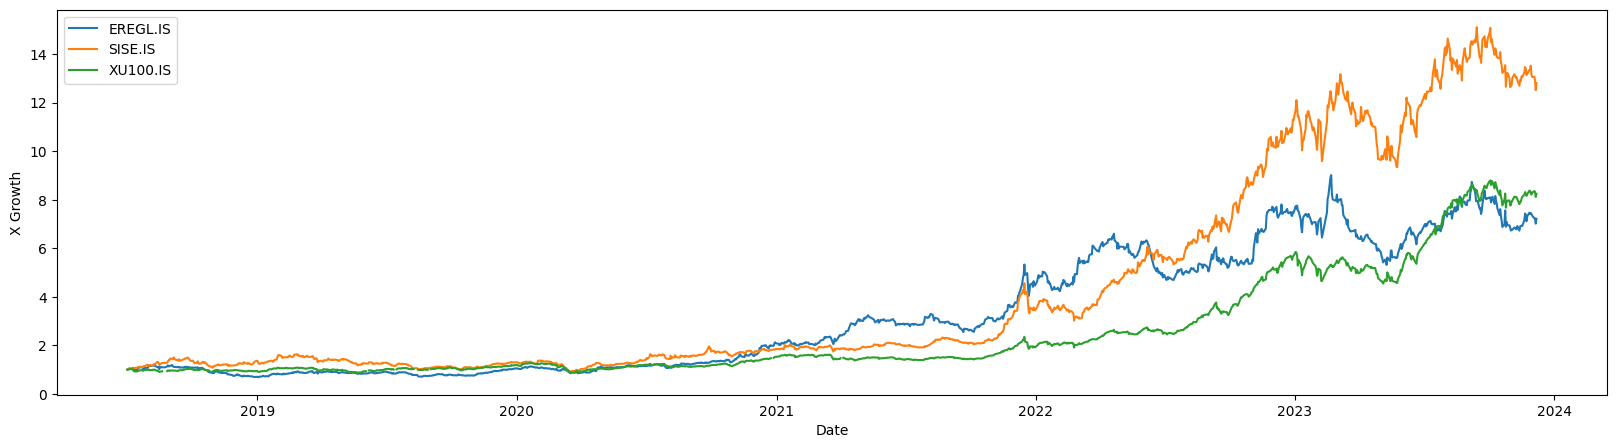

In [212]:
plt.figure(figsize=(20, 5))
plt.ylabel('X Growth')
plt.xlabel('Date')
plt.plot(df, label=df.columns)
plt.legend(loc="upper left")
plt.show()